> ## Regression problem in supervised machine learning
---
> ## Gold Price Prediction
---
> 

# 1. Connection to drive and import libraries
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install mediapipe
!pip install sklearn
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick
import pickle

print(f"""
  Library's versions:
    - pandas: {pd.__version__}
    - numpy: {np.__version__}
    - sklearn: {sklearn.__version__}
    - seaborn: {sns.__version__}
    - yellowbrick: {yellowbrick.__version__}
""")


  Library's versions:
    - pandas: 1.3.5
    - numpy: 1.21.6
    - sklearn: 1.0.2
    - seaborn: 0.11.2
    - yellowbrick: 1.5



# 2. Data Acquisition
---
> [**Gold Dataset Link**](https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data)



In [ ]:
PROJECT_PATH = '/content/drive/MyDrive/projects'

In [ ]:
FILE_PATH = f'{PROJECT_PATH}/dataset/gld_price_data.csv'
gold_df = pd.read_csv(FILE_PATH)
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
print(f'Dataset size (rows, columns): {gold_df.shape}')

Dataset size (rows, columns): (2290, 6)


In [ ]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
class DataVisualization:

    def __init__(self, df):
        self.df = df

    def correlation_plot(self):
        plt.figure(figsize = (8,8))
        sns.heatmap(
            self.df.corr(), 
            cbar=True, 
            square=True, 
            fmt='.2f',
            annot=True, 
            annot_kws={'size': 14}, 
            cmap='coolwarm'
        )
        plt.title('Correlation Heatmap', fontsize = 20)
        plt.show()

    
    def distribution_plot(self, feature: str):
        '''
          Distribution of the feature
        '''
        plt.figure(figsize = (10,6))
        sns.distplot(
            self.df[feature],
            color='green'
        )
        plt.title(f'{feature} distribution', fontsize = 20)
        plt.show()

In [ ]:
data_visualizer = DataVisualization(gold_df)

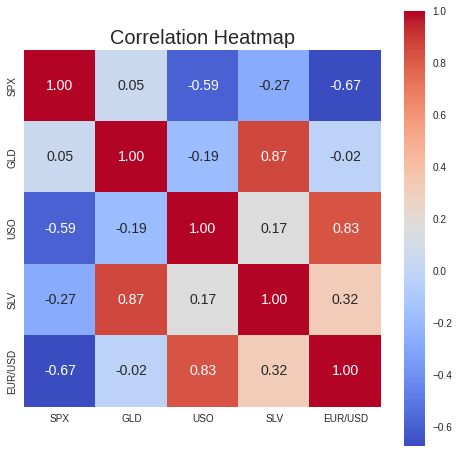

In [ ]:
data_visualizer.correlation_plot()

In [ ]:
print(gold_df.corr()['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


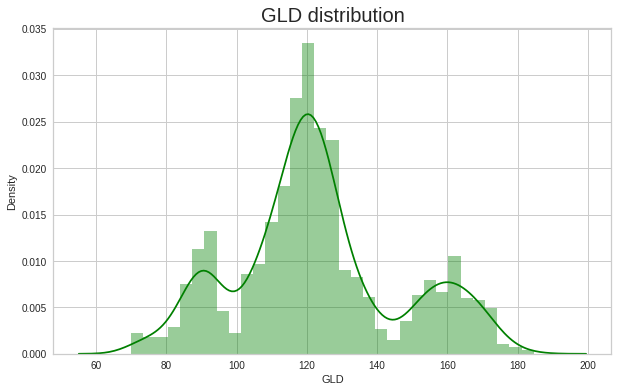

In [ ]:
data_visualizer.distribution_plot('GLD')

# 3. Data Processing
---

Splittin data into featrures nad targets
*   X - features
*   y - targets



In [ ]:
X = gold_df.drop(['Date', 'GLD'], axis=1)
y = gold_df['GLD']

In [ ]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [ ]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size: int) -> dict:
      X_train, X_test, y_train, y_test = train_test_split(
              X,               # features
              y,               # target
              test_size=test_size,
              random_state=42
      ) 

      print(f"""
        Input: 
            (Rows No, Column No)
            X: {X.shape} - 100% - feature dataset
            y: {y.shape} - 100% - target dataset
        Output:
            - training dataset:
                X_train: {X_train.shape} - {round(len(X_train) * 100/len(X))}%
                y_train: {y_train.shape} - {round(len(y_train) * 100/len(y))}%
            - testing dataset:
                X_test: {X_test.shape} - {round(len(X_test) * 100/len(X))}%
                y_test: {y_test.shape} - {round(len(y_test) * 100/len(y))}%
      """)
      return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2)


        Input: 
            (Rows No, Column No)
            X: (2290, 4) - 100% - feature dataset
            y: (2290,) - 100% - target dataset
        Output:
            - training dataset:
                X_train: (1832, 4) - 80%
                y_train: (1832,) - 80%
            - testing dataset:
                X_test: (458, 4) - 20%
                y_test: (458,) - 20%
      


# 4. Model Training

In [ ]:
dataset: dict = {
    'X': X,
    'X_train': X_train,
    'X_test': X_test,
    'y': y,
    'y_train': y_train,
    'y_test': y_test
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models: dict = {
    'Random_Forest_Regressor': RandomForestRegressor(),
    'Kernel_Ridge': KernelRidge(),
    'KNN': KNeighborsRegressor(),
    'MLP_Regressor' : MLPRegressor(max_iter=1000)
}

In [ ]:
from abc import ABC
from sklearn import metrics
from yellowbrick.model_selection import LearningCurve 

class ModelPerformance(ABC):

    def __init__(self, models: dict, dataset: dict):
        self.models = models 
        self.regressors: dict = {}
        self.regressors_df: pd.DataFrame = None
        self.scores: list  = [] 

        self.scoring = 'r2'
        
        self.X = dataset['X']
        self.X_train = dataset['X_train']
        self.X_test = dataset['X_test']
        self.y = dataset['y']
        self.y_train = dataset['y_train']
        self.y_test = dataset['y_test']

    def _calculate_model_score(self, algorithm: str, regressor: object) -> None:
      y_pred = regressor.predict(self.X_test)

      r2_score = metrics.r2_score(self.y_test, y_pred)
      mae = metrics.mean_absolute_error(self.y_test, y_pred)
      mse = metrics.mean_squared_error(self.y_test, y_pred)
      msle = metrics.mean_squared_log_error(self.y_test, y_pred)

      self.scores.append({           
          'Model': algorithm,
          'R2_score': r2_score,
          'MAE': mae,
          'MSE': mse,  
          'MSLE': msle
          })
      
    def plot_learning_curve(self) -> None:
        for algo, regressor in self.regressors.items():
              visualizer = LearningCurve(regressor, scoring=self.scoring, size=(800, 500))
              visualizer.fit(self.X, self.y)  
              visualizer.show()  

In [ ]:
class ModelCreation(ModelPerformance):

    def __init__(self, models: dict, dataset: dict):
        super(ModelCreation, self).__init__(models, dataset)
        for index, model in enumerate(self.models): print(f'{index + 1} - {model}')

    def build_model(self):
        for algorithm, model in self.models.items(): 
            model.fit(self.X_train, self.y_train) 
            self.regressors[algorithm] = model  
            print(f'{model} has been trained')
            self._calculate_model_score(algorithm, model)
            
        self.regressors_df = pd.DataFrame(self.scores, 
                                          columns=['Model', 'R2_score', 'MAE', 'MSE', 'MSLE'])
        

In [ ]:
model_creator = ModelCreation(models, dataset)

1 - Random_Forest_Regressor
2 - Kernel_Ridge
3 - KNN
4 - MLP_Regressor


In [ ]:
model_creator.build_model()

RandomForestRegressor() has been trained
KernelRidge() has been trained
KNeighborsRegressor() has been trained
MLPRegressor(max_iter=1000) has been trained


In [ ]:
model_creator.regressors_df

,Model,R2_score,MAE,MSE,MSLE
0,Random_Forest_Regressor,0.990704,1.246898,5.097118,0.000287
1,Kernel_Ridge,0.876257,5.804711,67.848151,0.003539
2,KNN,0.944547,3.710371,30.405027,0.001939
3,MLP_Regressor,0.910033,5.229035,49.328657,0.003083


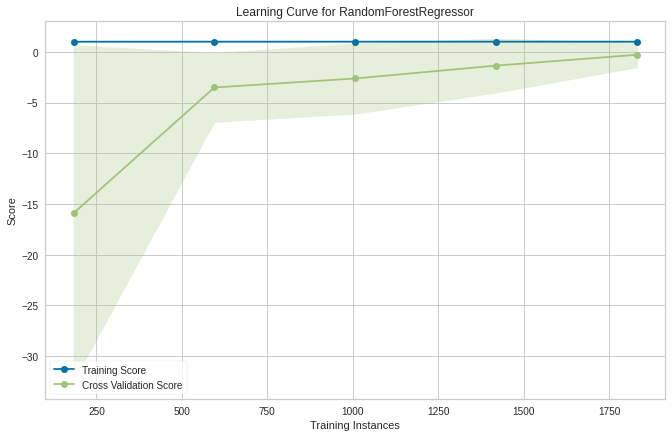

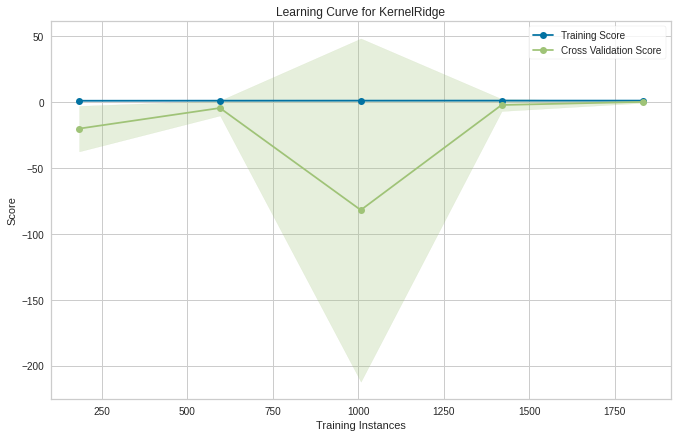

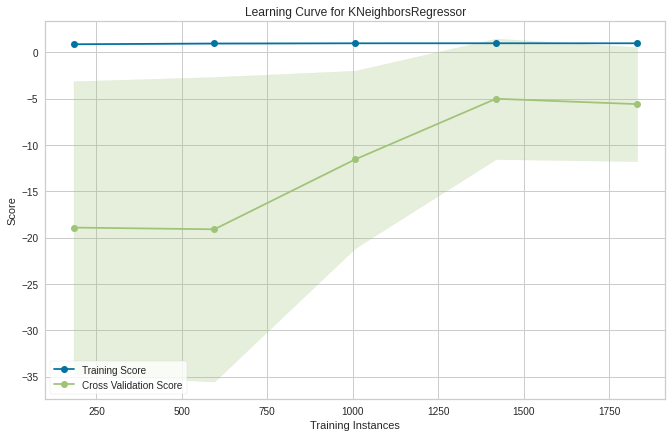

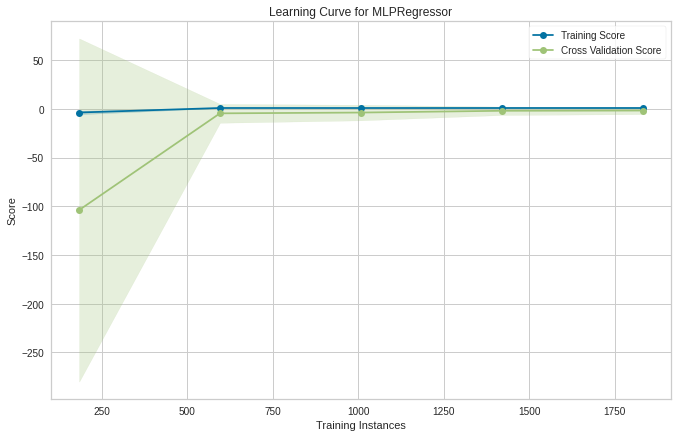

In [ ]:
model_creator.plot_learning_curve()

In [ ]:
regressors = model_creator.regressors
regressors

{'Random_Forest_Regressor': RandomForestRegressor(),
 'Kernel_Ridge': KernelRidge(),
 'KNN': KNeighborsRegressor(),
 'MLP_Regressor': MLPRegressor(max_iter=1000)}

# 5. Model Evaluation
---

In [ ]:
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

class ModelEvaluation:

    def __init__(self, estimators: dict, dataset: dict):
        self.estimators = estimators
        self.X = dataset['X']
        self.X_train = dataset['X_train']
        self.X_test = dataset['X_test']
        self.y = dataset['y']
        self.y_train = dataset['y_train']
        self.y_test = dataset['y_test']

    def plot_scores(self) -> None:
        r2_scores = {}
        mae_scores = {}
        mse_scores = {}
        msle_scores = {}
        
        for algo, model in self.estimators.items():
            y_pred = model.predict(self.X_test)
            r2_dict: dict = {'R2_score': metrics.r2_score(self.y_test, y_pred)}
            r2_scores[algo] = r2_dict
            mae_dict: dict = {'MAE': metrics.mean_absolute_error(self.y_test, y_pred)}
            mae_scores[algo] = mae_dict
            mse_dict: dict = {'MSE': metrics.mean_squared_error(self.y_test, y_pred)}
            mse_scores[algo] = mse_dict
            msle_dict: dict = {'MSLE': metrics.mean_squared_log_error(self.y_test, y_pred)}
            msle_scores[algo] = msle_dict

        fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
        pd.DataFrame(r2_scores).plot.bar(ax=ax1, title='R Square', ylabel='Value')
        pd.DataFrame(mae_scores).plot.bar(ax=ax2, title='Mean Absolute Eror', ylabel='Value')
        pd.DataFrame(mse_scores).plot.bar(ax=ax3, title='Mean Sequarred Eror', ylabel='Value')
        pd.DataFrame(msle_scores).plot.bar(ax=ax4, title='Mean Squarred Log Eror', ylabel='Value')
    
    def plot_acutal_prediction_values(self) -> None:
        for algo, model in self.estimators.items():
            y_pred = model.predict(X_test)
            plt.figure(figsize = (12,6))
            plt.plot(list(y_test), color='blue', label = 'Actual value')
            plt.plot(y_pred, color='green', label='Predicted Value')
            plt.title(f'Actual vs Predicted values in {algo}')
            plt.xlabel('Number of values')
            plt.ylabel('Values')
            plt.legend()
            plt.show()

    def plot_residuals(self) -> None:
        for algo, model in self.estimators.items():
            visualizer = ResidualsPlot(model, hist=False, qqplot=True, 
                                       train_color="goldenrod", 
                                       test_color="darkblue")
            visualizer.fit(self.X_train, self.y_train)
            visualizer.score(self.X_test, self.y_test) 
            visualizer.show()

    def plot_prediction_error(self) -> None:
        for algo, model in self.estimators.items():
            visualizer = PredictionError(model, line_color='red')
            visualizer.score(self.X_test, self.y_test) 
            visualizer.show()


In [ ]:
model_evaluator = ModelEvaluation(regressors, dataset)

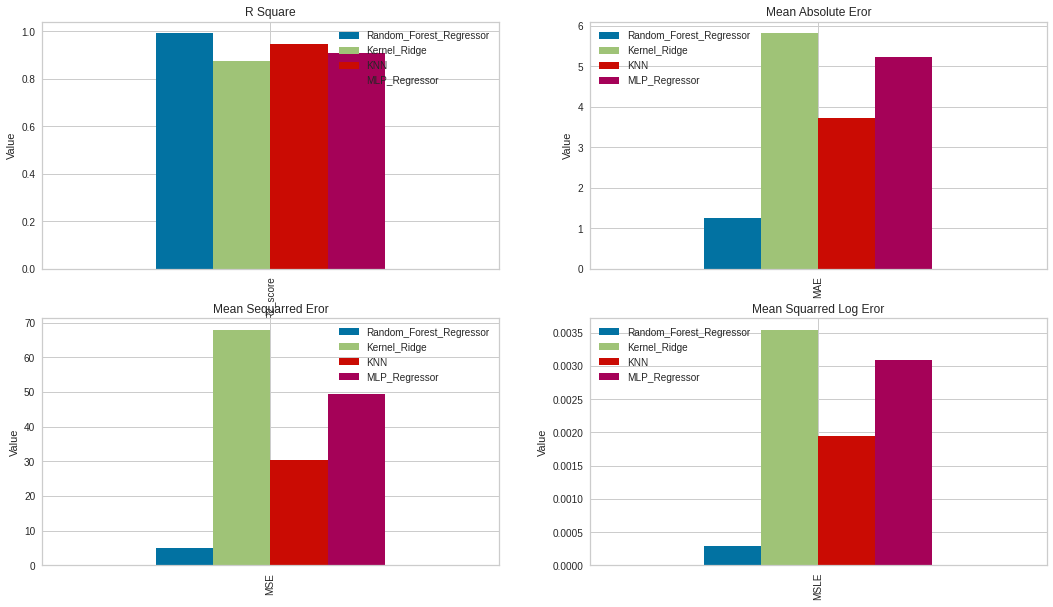

In [ ]:
model_evaluator.plot_scores()

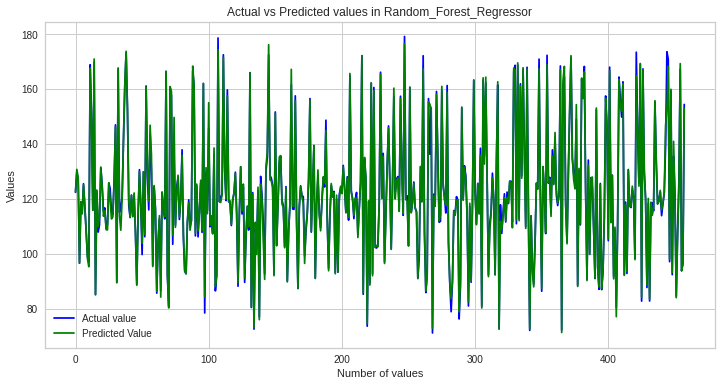

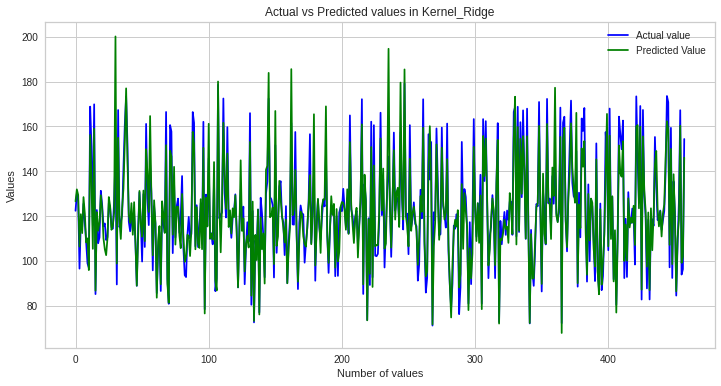

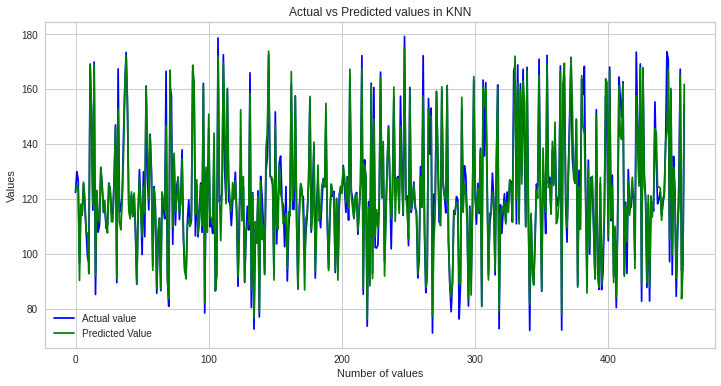

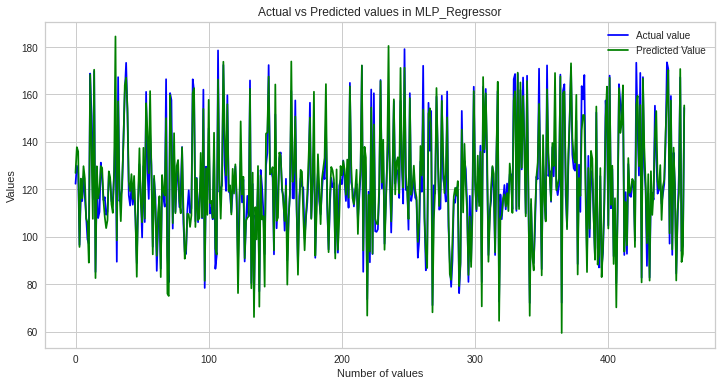

In [ ]:
model_evaluator.plot_acutal_prediction_values()

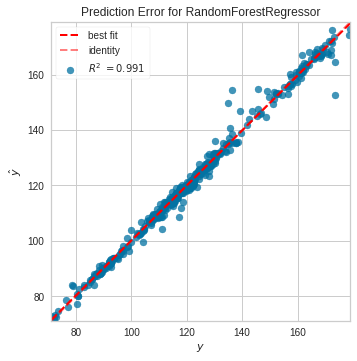

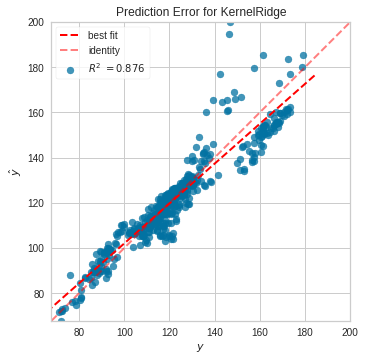

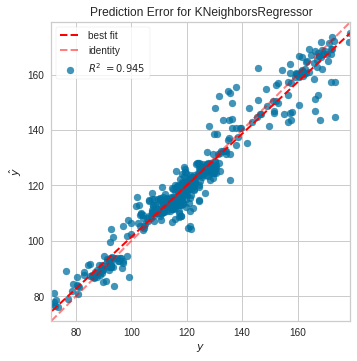

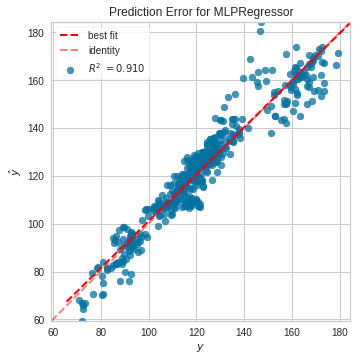

In [ ]:
model_evaluator.plot_prediction_error()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


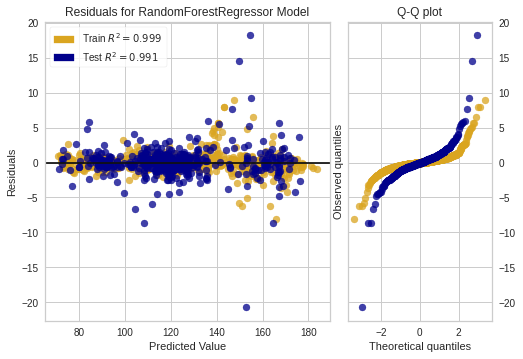

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  "X does not have valid feature names, but"


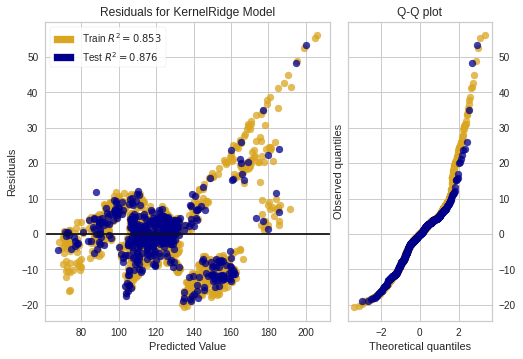

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


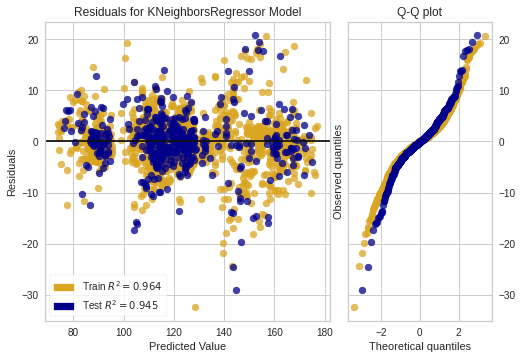

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


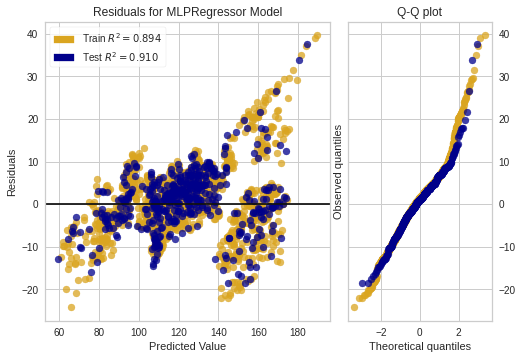

In [ ]:
model_evaluator.plot_residuals()

# 6. Hyperparameter tunning
---

```
models: dict = {
    'model_name': {
          'model': selected regressor
          'params': { 
              # tunned hyperparemters
              hiperparamter_list_1: []
              hiperparamter_list_2: []
              ...
          }
    }
    ...
}
```

In [ ]:
models: dict = {
    'Random_Forest_Regressor': {
        'model': RandomForestRegressor(),
        'params' : {
            'max_depth': [10, 20, 30, None],
            'max_features': ['auto', 'sqrt'],
            'n_estimators': [10, 100, 200, 400]
        }  
    },
    'Kernel_Ridge' : {
        'model': KernelRidge(),
        'params': {
            'degree': [1, 2, 3],
            'coef0': [1, 2, 3],
        }
    },
    'KNN' : {
        'model': KNeighborsRegressor(),
        'params': {
              'n_neighbors' : [2, 5, 7, 9, 11, 13, 15],
              'weights' : ['uniform', 'distance'],
              'metric' : ['minkowski', 'euclidean', 'manhattan']
        }
    },
    'MLP_Regressor' : {
        'model': MLPRegressor(max_iter=1000, random_state=0),
        'params': {
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'solver': ['adam', 'sgd'],
        }
    },
}

In [ ]:
from sklearn.model_selection import GridSearchCV 

class ModelRegularization(ModelPerformance):

    def __init__(self, models: dict, dataset: dict):
        super(ModelRegularization, self).__init__(models, dataset)
        for index, model in enumerate(self.models): print(f'{index + 1} - {model}')

    def tune_hyperparameters(self):
        for algorithm, model in self.models.items():
            regressor =  GridSearchCV(   
                model['model'],              
                model['params'],      
                cv=5,  
                return_train_score=False,
            )

            regressor.fit(self.X_train, self.y_train) 

            self._calculate_model_score(algorithm, regressor.best_estimator_)

            self.regressors[algorithm] = regressor.best_estimator_ 
            
            print(f'''
                {algorithm} was trained and tuned
                The best parameters for {algorithm}: {regressor.best_params_}
                ------------------------------------------------
            ''')
            
        self.regressors_df = pd.DataFrame(self.scores, 
                                          columns=['Model', 'R2_score', 'MAE', 'MSE', 'MSLE'])
    

In [ ]:
model_regularizator = ModelRegularization(models, dataset)

1 - Random_Forest_Regressor
2 - Kernel_Ridge
3 - KNN
4 - MLP_Regressor


In [ ]:
model_regularizator.tune_hyperparameters()


                Random_Forest_Regressor was trained and tuned
                The best parameters for Random_Forest_Regressor: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 400}
                ------------------------------------------------
            

                Kernel_Ridge was trained and tuned
                The best parameters for Kernel_Ridge: {'coef0': 1, 'degree': 1}
                ------------------------------------------------
            

                KNN was trained and tuned
                The best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
                ------------------------------------------------
            


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m


                MLP_Regressor was trained and tuned
                The best parameters for MLP_Regressor: {'activation': 'relu', 'alpha': 0.05, 'solver': 'adam'}
                ------------------------------------------------
            


In [ ]:
model_regularizator.regressors_df

,Model,R2_score,MAE,MSE,MSLE
0,Random_Forest_Regressor,0.990475,1.280948,5.222537,0.000291
1,Kernel_Ridge,0.876257,5.804711,67.848151,0.003539
2,KNN,0.961858,2.920822,20.913159,0.001251
3,MLP_Regressor,0.853483,7.044640,80.335304,0.004978


In [ ]:
tuned_regressors = model_regularizator.regressors
tuned_regressors

{'Random_Forest_Regressor': RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=400),
 'Kernel_Ridge': KernelRidge(degree=1),
 'KNN': KNeighborsRegressor(metric='manhattan', weights='distance'),
 'MLP_Regressor': MLPRegressor(alpha=0.05, max_iter=1000, random_state=0)}

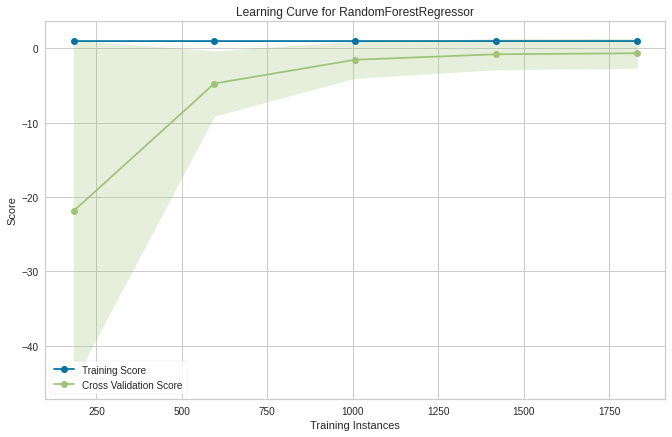

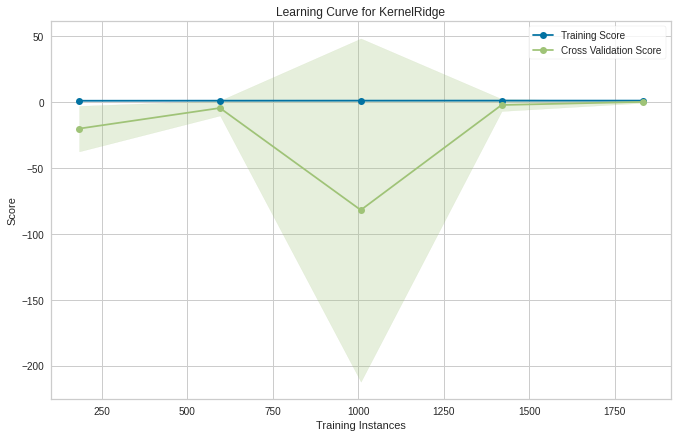

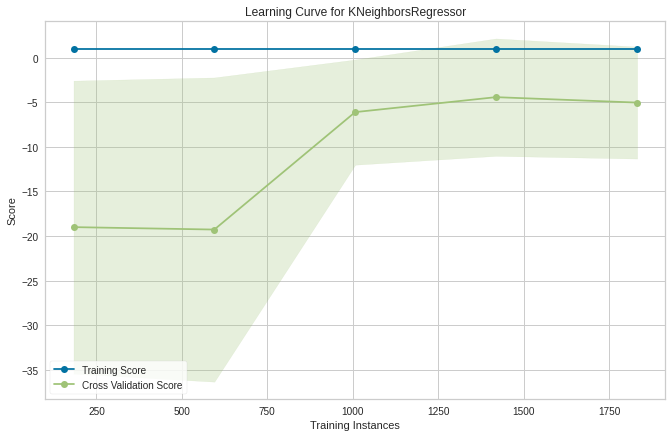

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


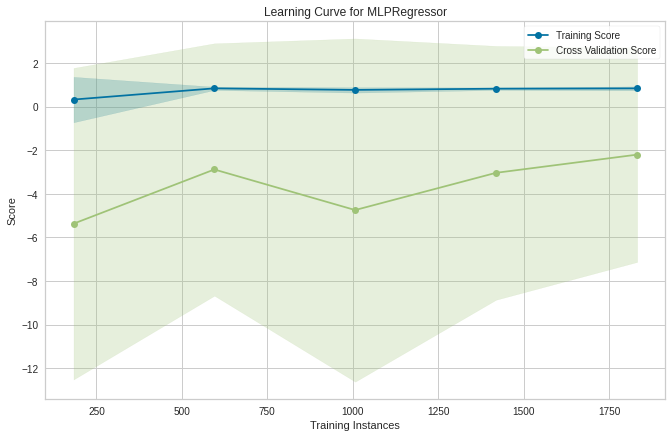

In [ ]:
model_regularizator.plot_learning_curve()

# 6. Tuned Model Evaluation

In [ ]:
model_evaluator = ModelEvaluation(tuned_regressors, dataset)

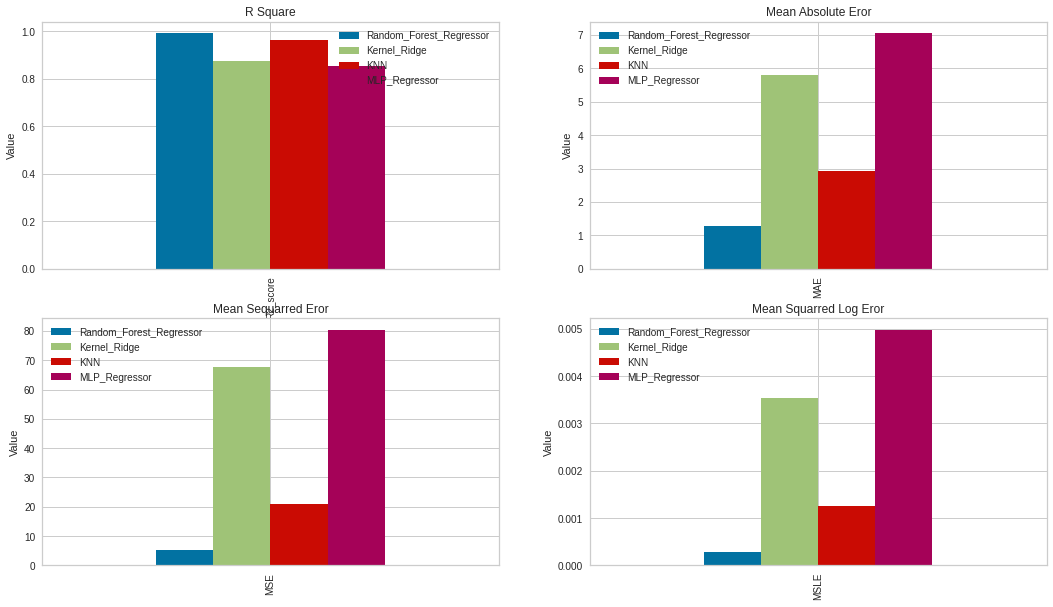

In [ ]:
model_evaluator.plot_scores()

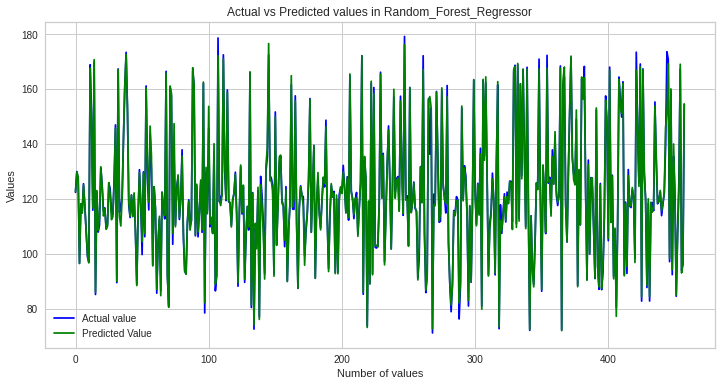

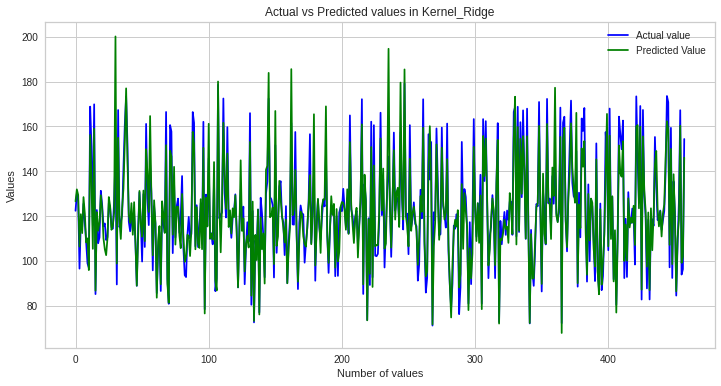

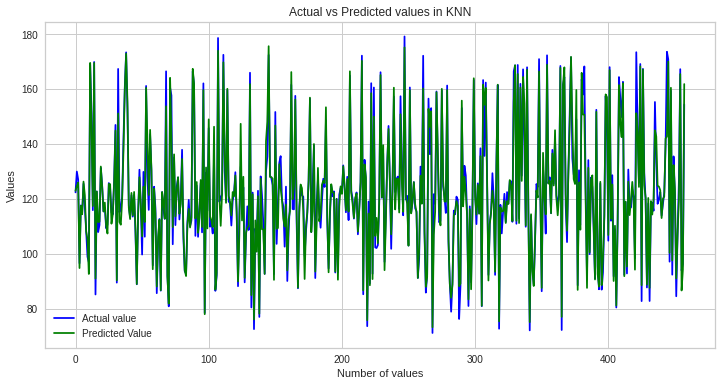

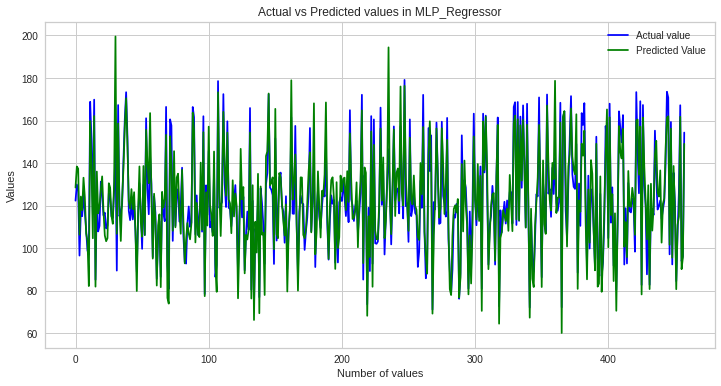

In [ ]:
model_evaluator.plot_acutal_prediction_values()

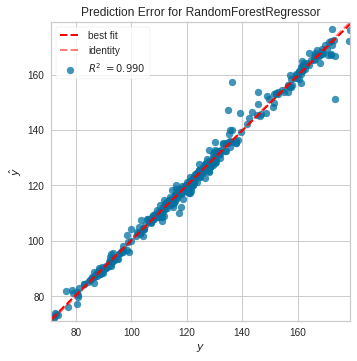

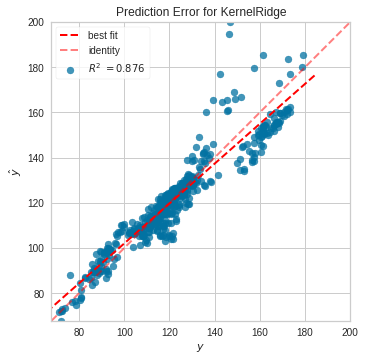

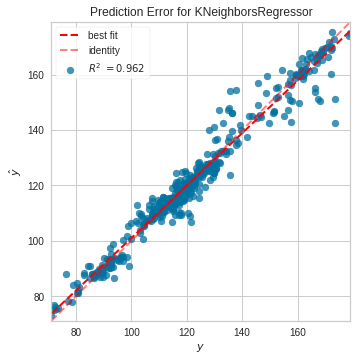

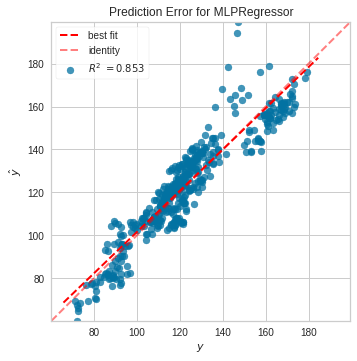

In [ ]:
model_evaluator.plot_prediction_error()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


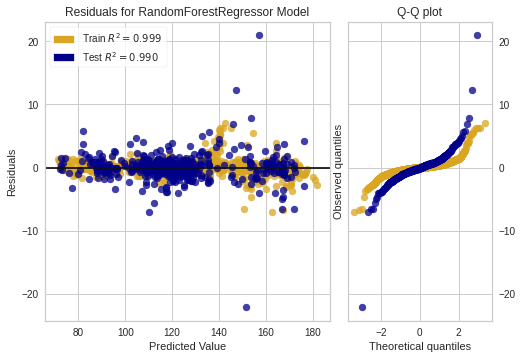

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  "X does not have valid feature names, but"


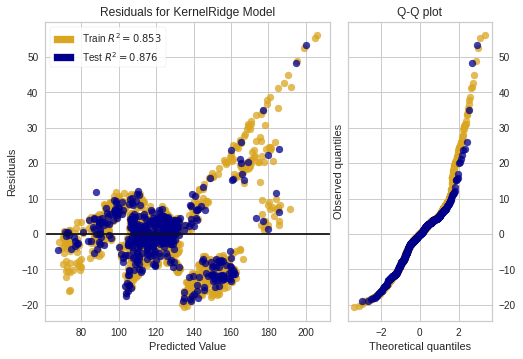

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


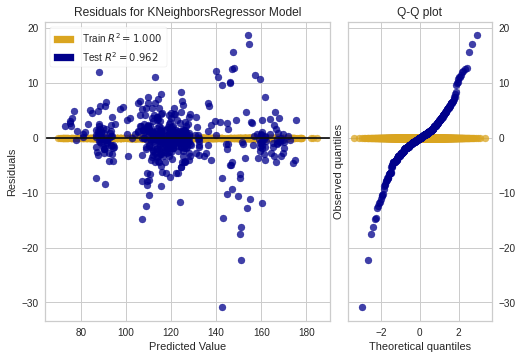

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


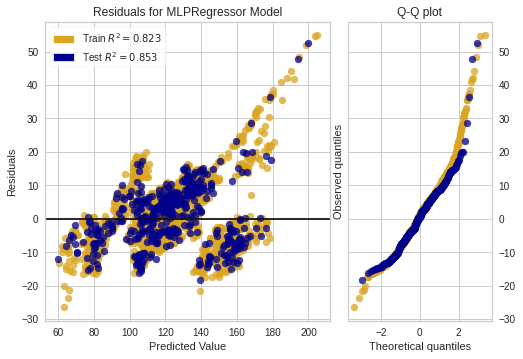

In [ ]:
model_evaluator.plot_residuals()

# 7. Save and load model

In [ ]:
for index, tuned_regressor in enumerate(tuned_regressors):
     print(f'{index+1}. {tuned_regressors[tuned_regressor]}')

1. RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=400)
2. KernelRidge(degree=1)
3. KNeighborsRegressor(metric='manhattan', weights='distance')
4. MLPRegressor(alpha=0.05, max_iter=1000, random_state=0)


In [ ]:
MODEL_DIR_PATH = '/content/drive/MyDrive/projects/regression_model'

In [ ]:
for tuned_regressor in tuned_regressors:
    selected_model = tuned_regressors[tuned_regressor]
    
    path = f"{MODEL_DIR_PATH}/GOLD_{tuned_regressor}.pt" 
    
    with open(path, 'wb') as file:
        pickle.dump(selected_model, file)


In [ ]:
path = f"{MODEL_DIR_PATH}/GOLD_Random_Forest_Regressor.pt" 

with open(path, 'rb') as file:
    model = pickle.load(file)

model

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=400)